<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=160px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Barabasi-Albert Model and Preferential Attachment</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

from itertools import chain
import networkx as nx

import watermark

%load_ext watermark
%matplotlib inline

Watermark the notebook with current versions of all loaded libraries

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: bd0d55512d2130c113fdbc721eea484e3e7b1f5b

numpy     : 1.19.2
pandas    : 1.1.3
matplotlib: 3.3.2
networkx  : 2.5
json      : 2.0.9
watermark : 2.1.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Graph Models

### Barabasi-Albert model

The implementation of the Barabasi-Albert model in straightforward. Here we start with m0+1 fully connected nodes and add m0 new edges at each time step

In [4]:
def barabasi_albert_graph(N, m0=3):    
    # Store all the edges in a list
    edges = []
    
    # For every starting node
    for i in range(m0):
        
        # Create an edge with every node with larger id
        for j in range(i+1, m0):
            # Edges are store as 'flat' sequences of edges
            edges.append(i)
            edges.append(j)
    
    # For all the other nodes
    for node_i in range(m0, N):
        new_edges = set()
        
        # Make sure we don't add duplicated edges
        while len(new_edges) < m0:
            pos = np.random.randint(len(edges))
            node_j = edges[pos]
            
            if node_i != node_j: 
                new_edges.add(node_j)

        # Add the new edges to the edge list
        edges.extend(chain.from_iterable(zip([node_i]*m0, new_edges)))
    
    # Reshape the edge list as two columns
    edges = np.array(edges).reshape(-1,2)
    
    # Create an empty graph
    G = nx.Graph()
    
    # Add edges to the Graph
    G.add_edges_from(edges)

    return G

We generate a simple network with this procedure

In [5]:
N=1_000_000

In [6]:
BA = barabasi_albert_graph(N, m0=5)

And check that we have the right number of nodes

In [7]:
BA.number_of_nodes()

1000000

And the expected number of edges $$E=N_0\frac{N_0-1}{2}+m_0t$$

In [8]:
BA.number_of_edges()

4999985

Compute the degree distribution

In [9]:
Pk = pd.DataFrame(Counter(dict(BA.degree()).values()).items(), 
                  columns=['k', 'Pk']).set_index('k').sort_index()
Pk.Pk/=N

And a straight line to guide the eye

In [10]:
k = np.arange(1, 10000, dtype='float')
Pk_theory = 1000*k**(-3)

Which we can plot side by side

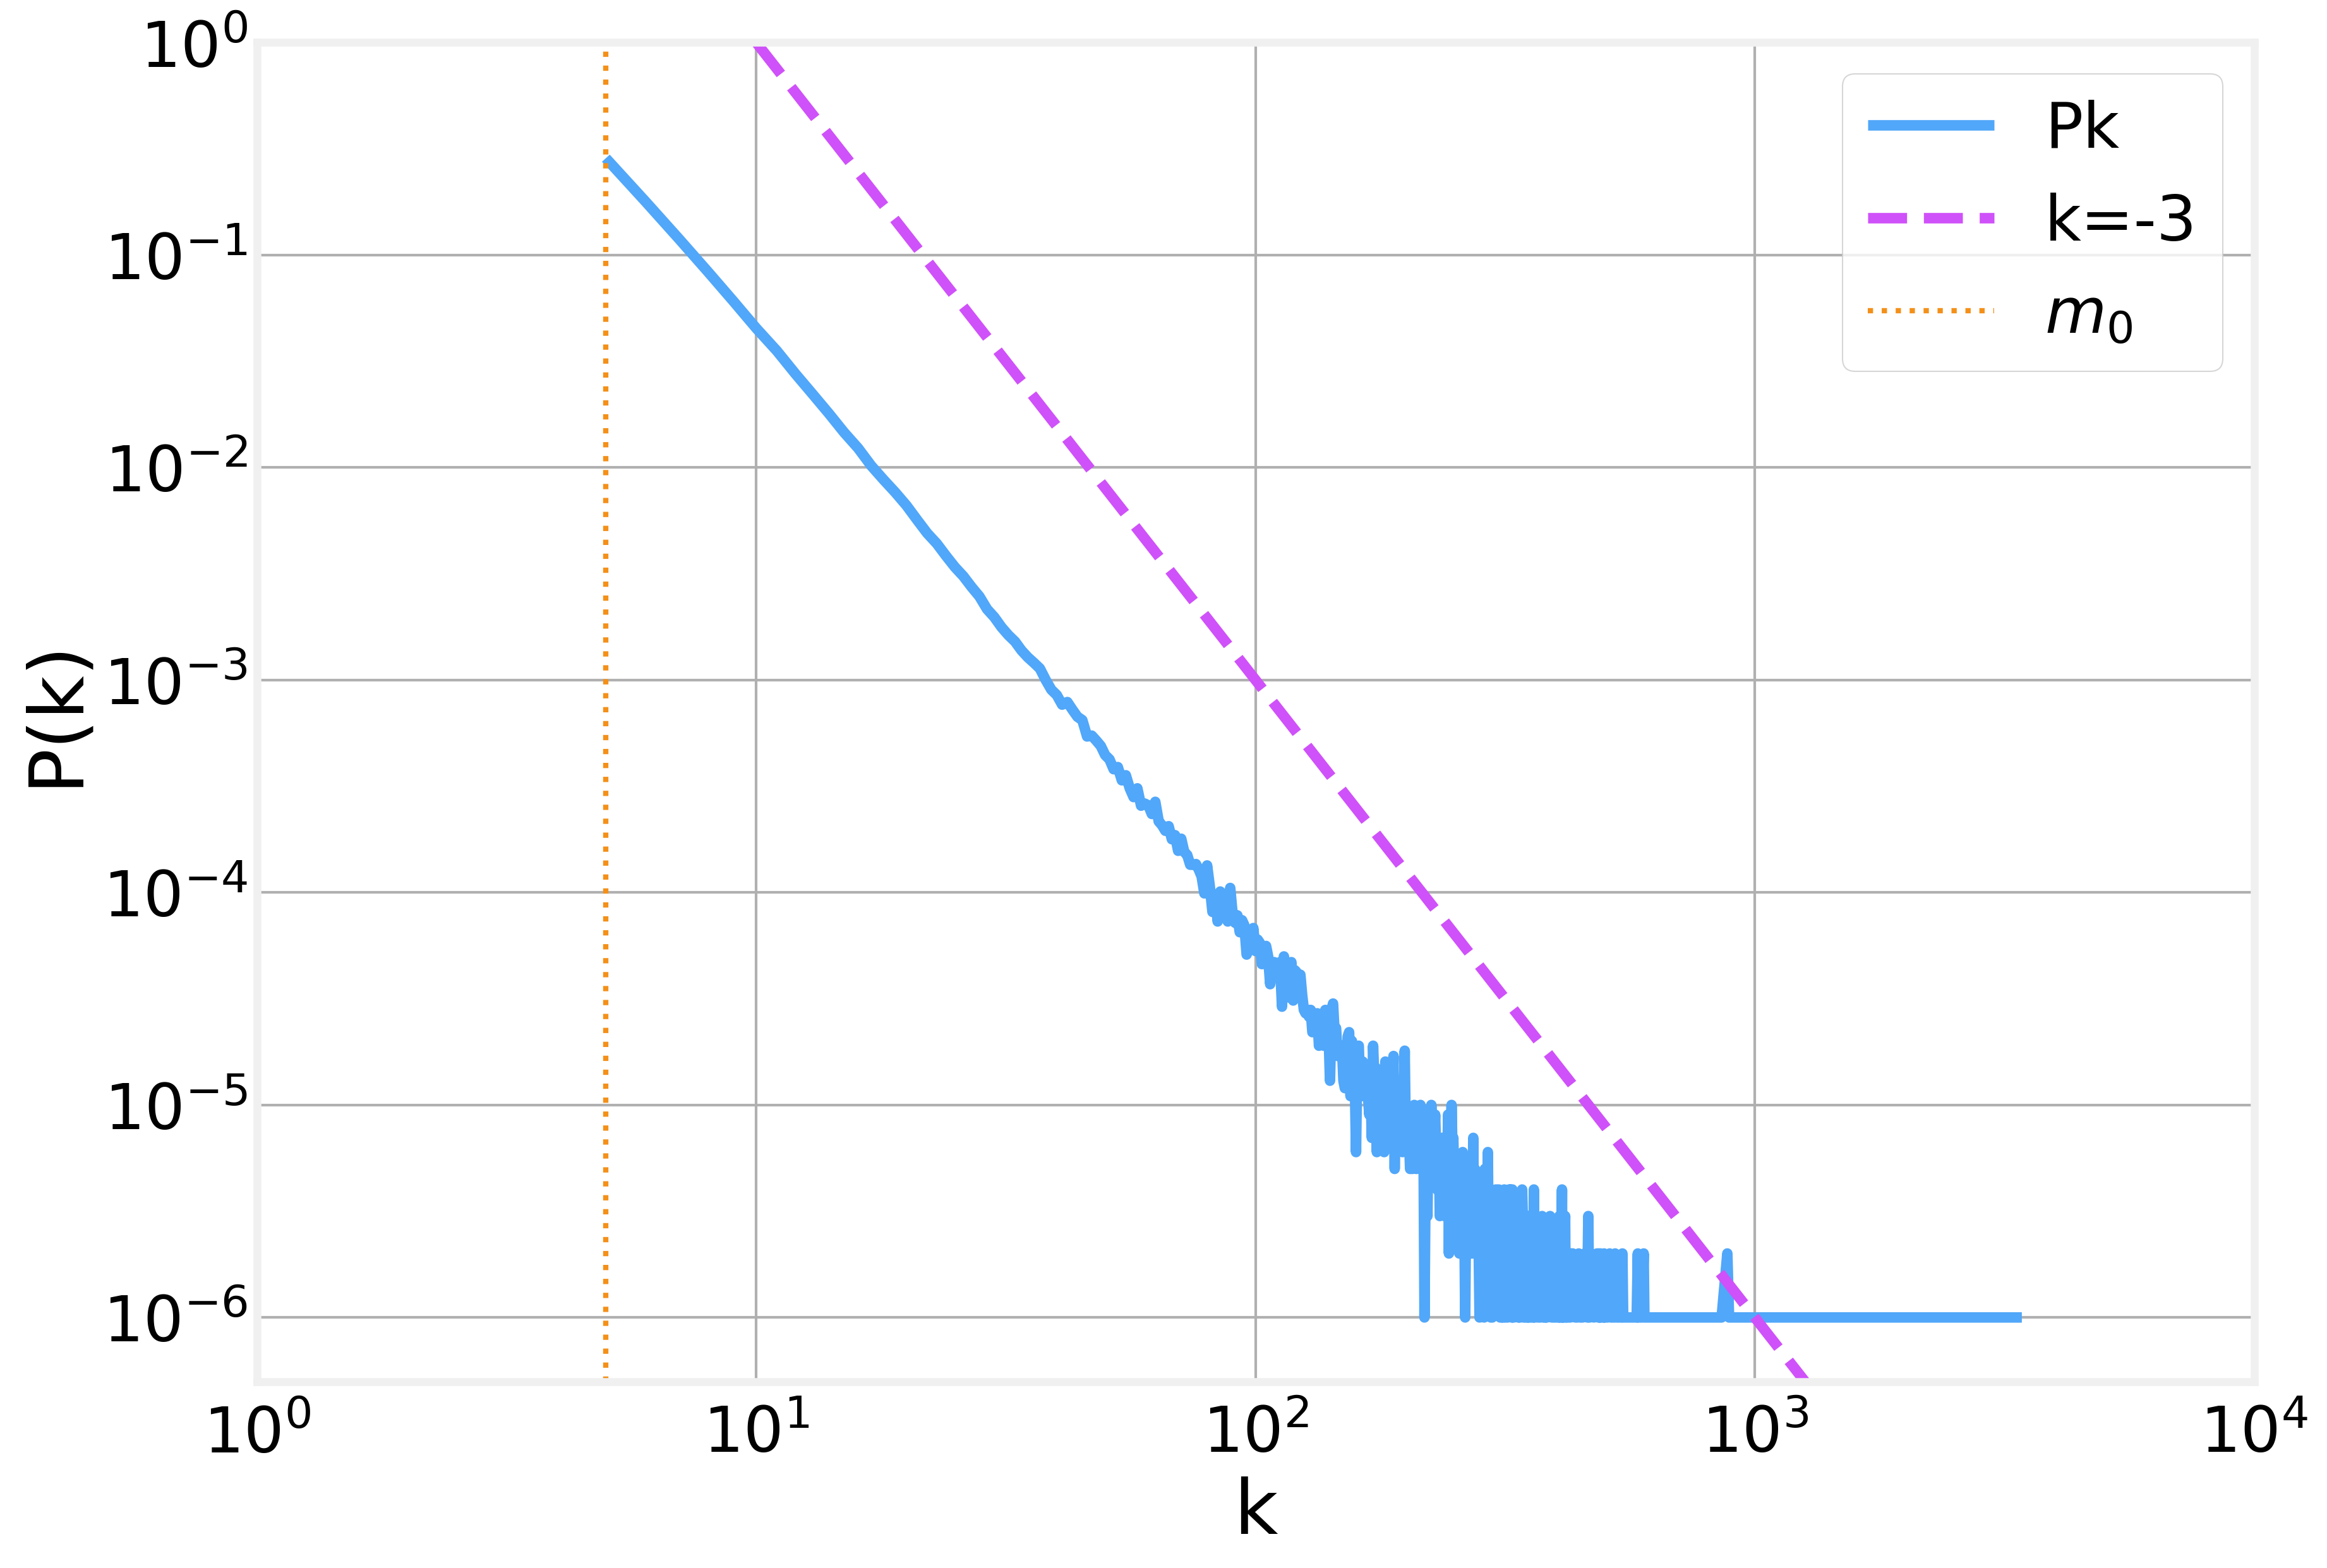

In [11]:
ax = Pk.plot(legend=None)
ax.plot(k, Pk_theory, linestyle='--')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(.5*1e-6, 1)
ax.set_xlim(1, 1e4)

ax.axvline(x=5, linestyle=':', color=colors[3], linewidth=2)

for tick_label in ax.xaxis.get_majorticklabels():
    tick_label.set_y(-.01)

ax.legend(['Pk', 'k=-3', r'$m_0$'])

Naturally, the degrees start at the value of $m_0$ we set.

We also plot the degree as a function of the node ID to illustrate how the process is unfair

In [12]:
degrees = pd.DataFrame(BA.degree(), columns=['node', 'k']).set_index('node')

Text(0.5, 0, 'node$_i$')

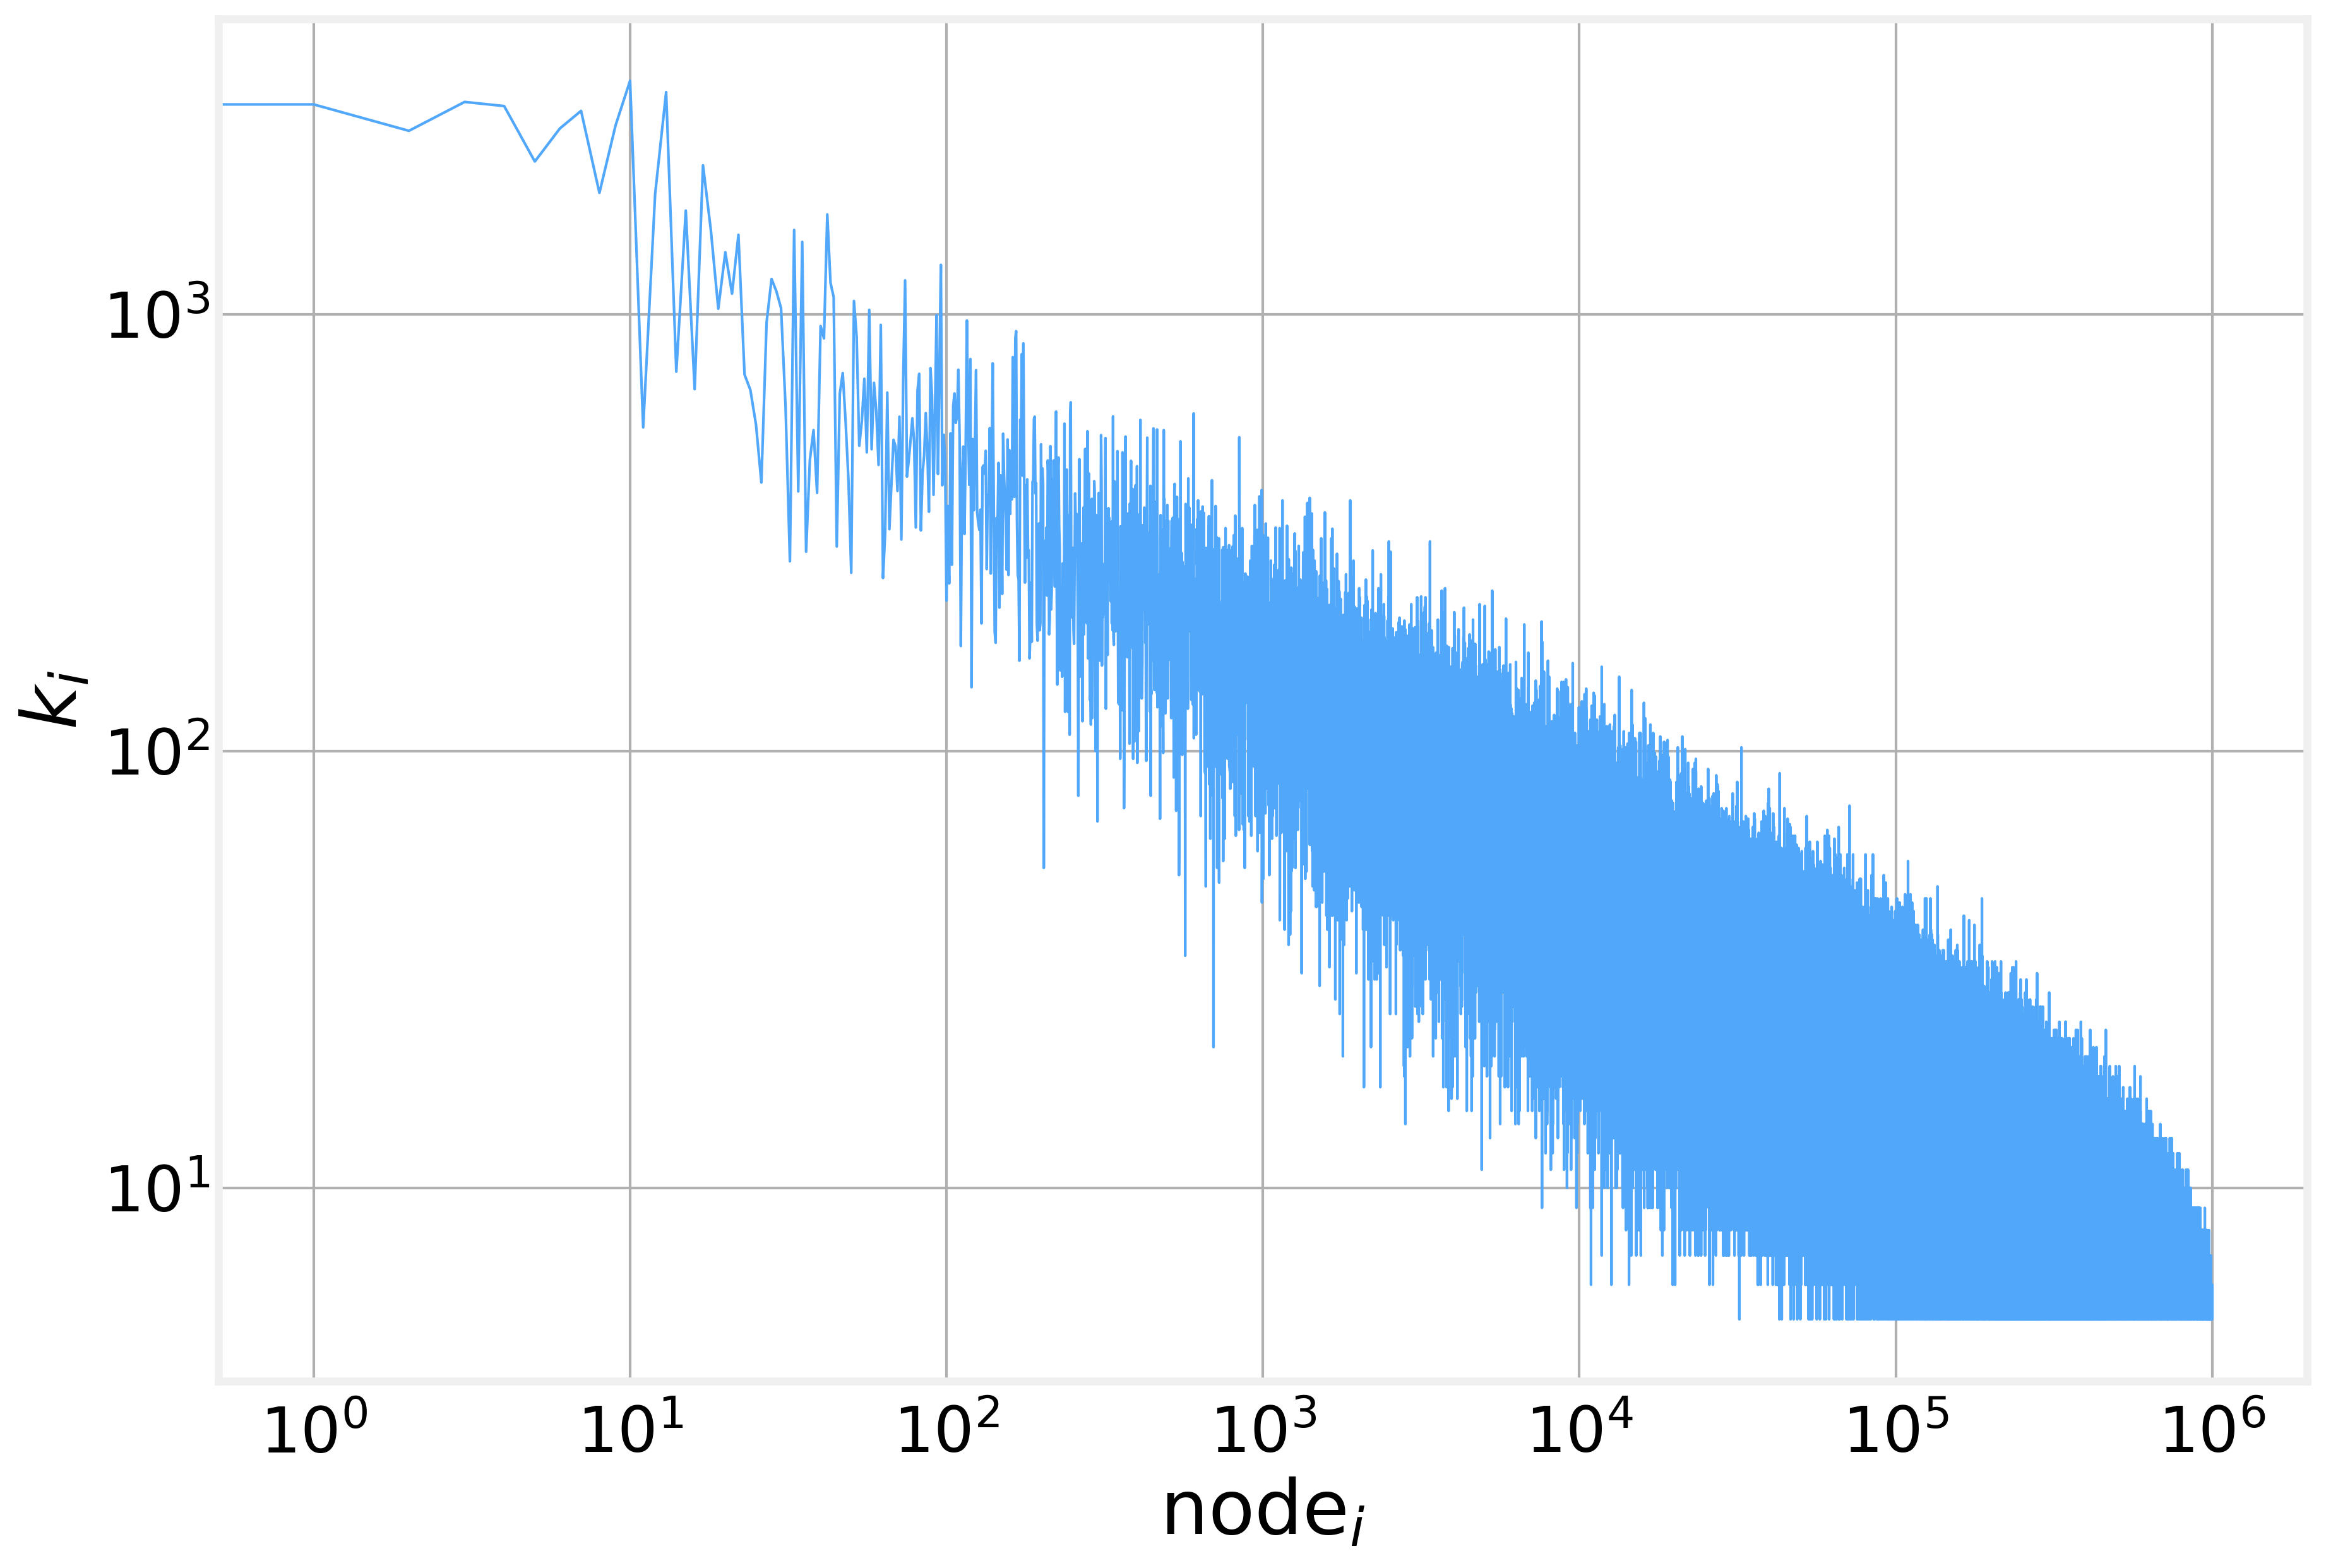

In [13]:
ax = degrees.plot(lw=1, legend=None)
ax.set_yscale('log')
ax.set_xscale('log')

for tick_label in ax.xaxis.get_majorticklabels():
    tick_label.set_y(-.01)
    
ax.set_ylabel(r'$k_i$')
ax.set_xlabel(r'node$_i$')

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>